## Install and Import required libraies

In [158]:
pip install pandas-profiling;

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [159]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [160]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pf
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import category_encoders  as ce 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
%matplotlib inline
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("crest")
import warnings
warnings.filterwarnings('ignore')

In [162]:
def classification_metrics(y_test,y_pred):
    print("Accuracy is: ", accuracy_score(y_test,y_pred))
    print("Precision is: ", precision_score(y_test,y_pred))
    print("Recall is: ", recall_score(y_test,y_pred))
    print("F1-Score is: ", f1_score(y_test,y_pred))

In [163]:
def roc_curve_plot(y_test,y_pred,y_train,y_pred_train):
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
    fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_train)
    plt.plot(fpr, tpr)
    plt.plot(fpr1, tpr1)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Curve")
    plt.show()

### Load the Dataset

In [164]:
churn = pd.read_csv('telecom_churn.csv')

### Exploratory Data Analysis (EDA)

In [165]:
churn.head()

customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode date_of_registration  num_dependents  estimated_salary  calls_made  \
0   755597           2020-01-01               4            124962          44   
1   125926           2020-01-01               2            130556          62   
2   423976           2020-01-01               0            148828          49   
3   522841           2020-01-01               1             38722          80   
4   740247           2020-01-01               2             55098          78   

   sms_sent  data_used  churn  
0        45       -361      0  
1        39       5973      0  
2        24        193      1  
3        25       9377      1  
4        15       1393      0

In [166]:
churn.tail()

customer_id telecom_partner gender  age           state       city  \
243548       243549          Airtel      F   28         Mizoram    Kolkata   
243549       243550    Reliance Jio      F   52           Assam    Kolkata   
243550       243551    Reliance Jio      M   59         Tripura    Kolkata   
243551       243552            BSNL      M   49  Madhya Pradesh    Kolkata   
243552       243553            BSNL      F   37       Telangana  Hyderabad   

        pincode date_of_registration  num_dependents  estimated_salary  \
243548   110295           2023-05-03               3            130580   
243549   713481           2023-05-03               0             82393   
243550   520218           2023-05-03               4             51298   
243551   387744           2023-05-03               2             83981   
243552   139086           2023-05-04               0            144297   

        calls_made  sms_sent  data_used  churn  
243548          28         9       4102      0  
243549          80        45       7521      0  
243550          26         4       6547      0  
243551          80        15       1125      0  
243552          61         7       3384      0

In [167]:
print(f"Total rows: {churn.shape[0]:,}")

Total rows: 243,553


In [168]:
print(f"Total columns: {churn.shape[1]}")

Total columns: 14


In [169]:
print("\nDATA TYPES\n")
print(churn.dtypes.value_counts())


DATA TYPES

int64     9
object    5
dtype: int64


In [170]:
churn.dtypes

customer_id              int64
telecom_partner         object
gender                  object
age                      int64
state                   object
city                    object
pincode                  int64
date_of_registration    object
num_dependents           int64
estimated_salary         int64
calls_made               int64
sms_sent                 int64
data_used                int64
churn                    int64
dtype: object

In [171]:
churn.describe()

customer_id            age        pincode  num_dependents  \
count  243553.000000  243553.000000  243553.000000   243553.000000   
mean   121777.000000      46.077609  549501.270541        1.997500   
std     70307.839393      16.444029  259808.860574        1.414941   
min         1.000000      18.000000  100006.000000        0.000000   
25%     60889.000000      32.000000  324586.000000        1.000000   
50%    121777.000000      46.000000  548112.000000        2.000000   
75%    182665.000000      60.000000  774994.000000        3.000000   
max    243553.000000      74.000000  999987.000000        4.000000   

       estimated_salary     calls_made       sms_sent      data_used  \
count     243553.000000  243553.000000  243553.000000  243553.000000   
mean       85021.137839      49.010548      23.945404    4993.186025   
std        37508.963233      29.453556      14.733575    2942.019547   
min        20000.000000     -10.000000      -5.000000    -987.000000   
25%        52585.000000      24.000000      11.000000    2490.000000   
50%        84990.000000      49.000000      24.000000    4987.000000   
75%       117488.000000      74.000000      36.000000    7493.000000   
max       149999.000000     108.000000      53.000000   10991.000000   

               churn  
count  243553.000000  
mean        0.200478  
std         0.400359  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [172]:
churn.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [173]:
print(f"Number of duplicate rows: {churn.duplicated().sum()}")

Number of duplicate rows: 0


In [174]:
numeric_cols = churn.select_dtypes(include='number')

negatives = (numeric_cols < 0).sum()

negatives_with_values = negatives[negatives > 0]
print("Columns with negative values:\n")
print(negatives_with_values)

Columns with negative values:

calls_made    6713
sms_sent      7375
data_used     6050
dtype: int64


In [175]:
outliers = {}
numerical_cols = ['age', 'estimated_salary', 'num_dependents',  'calls_made', 'sms_sent', 'data_used']
for col in numerical_cols:
    Q1 = churn[col].quantile(0.25)
    Q3 = churn[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    count = churn[(churn[col] < lower) | (churn[col] > upper)].shape[0]
    outliers[col] = count

print("Outliers detected using IQR (full result):")
for col, cnt in outliers.items():
   
    print(f"{col}: {cnt}")



Outliers detected using IQR (full result):
age: 0
estimated_salary: 0
num_dependents: 0
calls_made: 0
sms_sent: 0
data_used: 0


In [176]:
cols_to_fix = ['calls_made', 'sms_sent', 'data_used']

negative = (churn[cols_to_fix] < 0).any(axis=1)

churn_partial = churn[~negative]


print(f"Original rows: {churn.shape[0]}")
print(f"Rows removed: {negative.sum()}")
print(f"Cleaned dataset rows: {churn_partial.shape[0]}")

Original rows: 243553
Rows removed: 19587
Cleaned dataset rows: 223966


In [177]:
numeric_cols = churn_partial.select_dtypes(include='number')

negatives = (numeric_cols < 0).sum()

negatives_with_values = negatives[negatives > 0]
print("Columns with negative values:\n")
print(negatives_with_values)

Columns with negative values:

Series([], dtype: int64)


In [178]:
churn_partial.groupby("customer_id").mean().calls_made

customer_id
2         62.0
3         49.0
4         80.0
5         78.0
6         91.0
          ... 
243549    28.0
243550    80.0
243551    26.0
243552    80.0
243553    61.0
Name: calls_made, Length: 223966, dtype: float64

In [179]:
churn_partial.groupby("customer_id").mean().sms_sent

customer_id
2         39.0
3         24.0
4         25.0
5         15.0
6         24.0
          ... 
243549     9.0
243550    45.0
243551     4.0
243552    15.0
243553     7.0
Name: sms_sent, Length: 223966, dtype: float64

In [180]:
churn_partial.groupby("telecom_partner").mean().calls_made

telecom_partner
Airtel          50.530847
BSNL            50.489824
Reliance Jio    50.679828
Vodafone        50.260600
Name: calls_made, dtype: float64

In [181]:
churn_partial.groupby("telecom_partner").mean().sms_sent

telecom_partner
Airtel          24.732610
BSNL            24.799002
Reliance Jio    24.819806
Vodafone        24.725540
Name: sms_sent, dtype: float64

In [182]:
churn_partial.groupby("telecom_partner").mean().data_used

telecom_partner
Airtel          5139.831274
BSNL            5130.096162
Reliance Jio    5113.062612
Vodafone        5124.351116
Name: data_used, dtype: float64

In [183]:
churn_partial.groupby("telecom_partner").mean().estimated_salary

telecom_partner
Airtel          85157.453868
BSNL            84875.720009
Reliance Jio    85047.251305
Vodafone        85099.620647
Name: estimated_salary, dtype: float64

<AxesSubplot:xlabel='estimated_salary'>

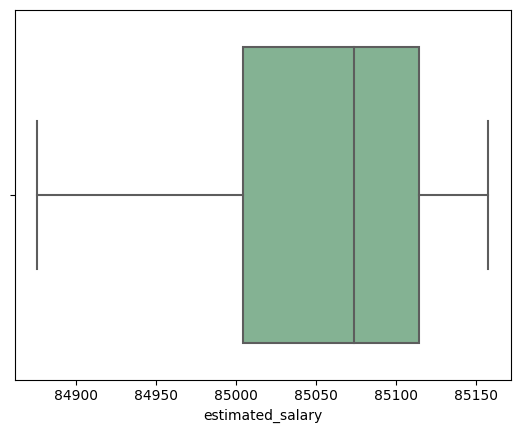

In [184]:
tdm=churn_partial.groupby("telecom_partner").mean().estimated_salary
sns.boxplot(x=tdm)

### Check class imbalance for target variable (churn)

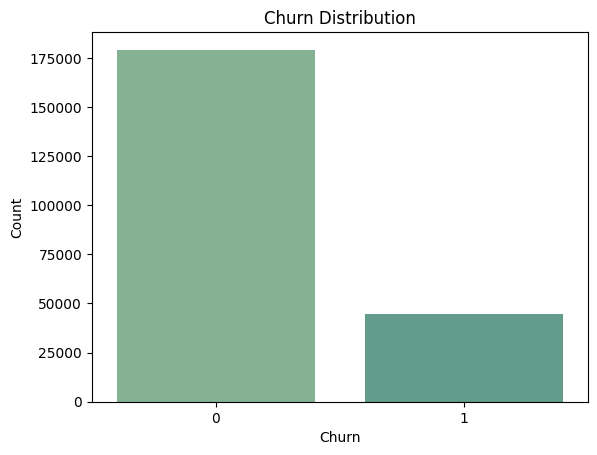

0    79.99875
1    20.00125
Name: churn, dtype: float64


In [185]:
sns.countplot(data=churn_partial, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print(churn_partial['churn'].value_counts(normalize=True) * 100)

## Statistical analysis and visualize

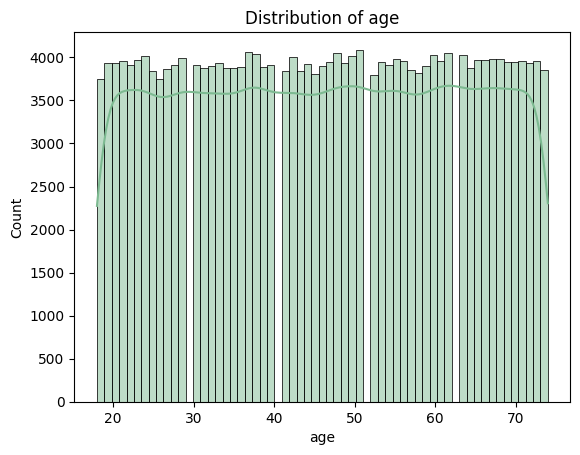

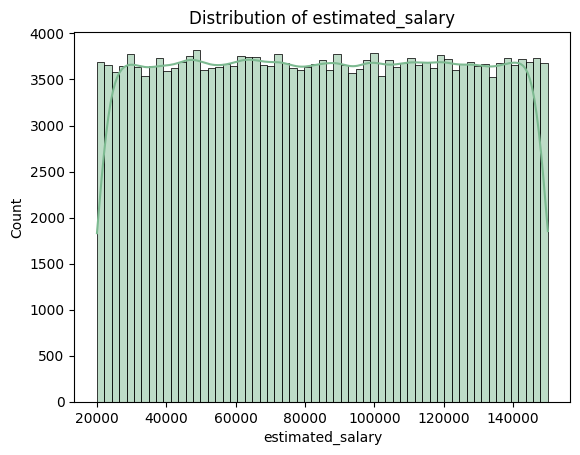

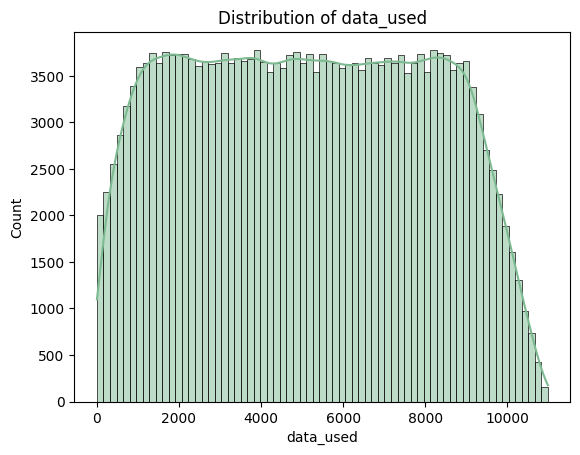

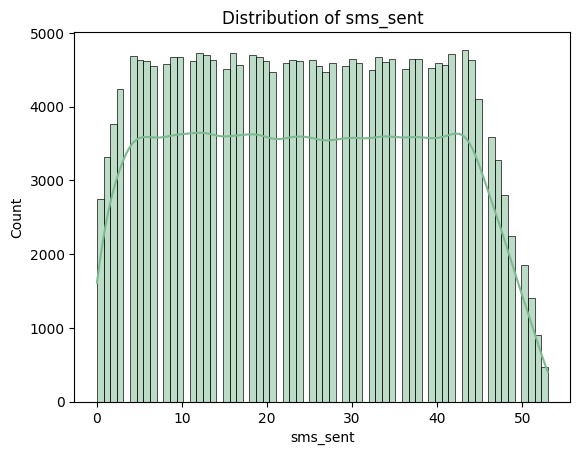

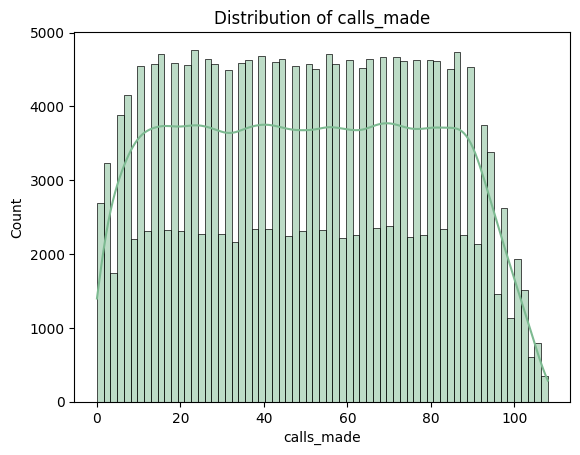

In [186]:
key_vars = ['age', 'estimated_salary', 'data_used', 'sms_sent', 'calls_made']

for var in key_vars:
    sns.histplot(churn_partial[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

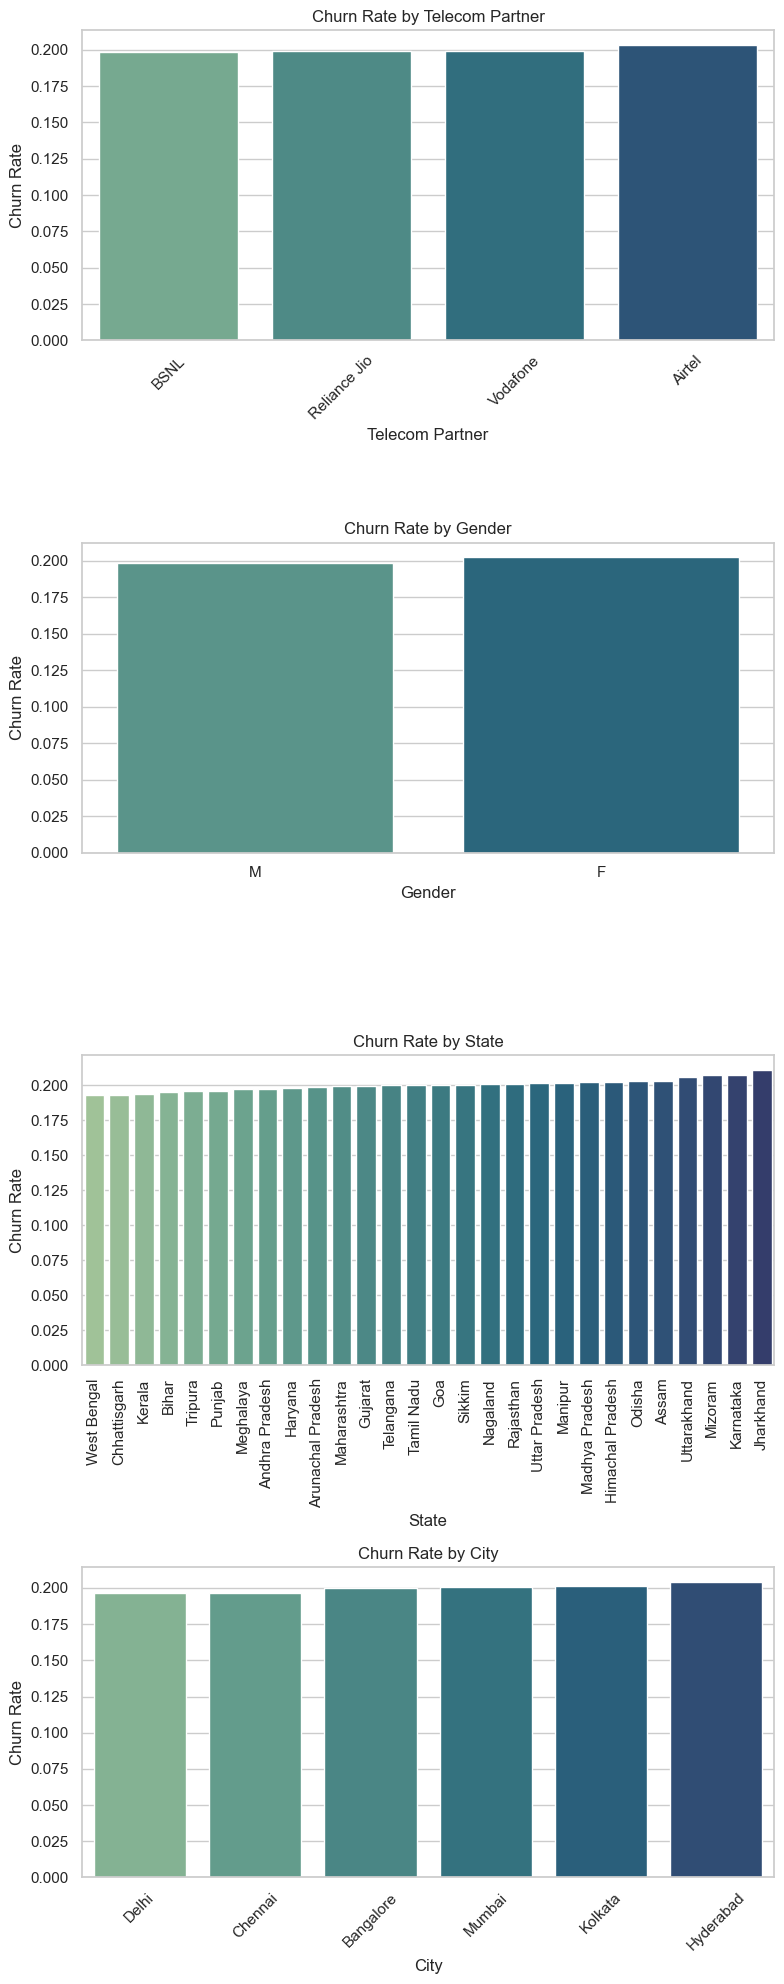

In [187]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 1, figsize=(8, 20))  


churn_rates_tp = churn_partial.groupby('telecom_partner')['churn'].mean().sort_values()
sns.barplot(x=churn_rates_tp.index, y=churn_rates_tp.values, ax=axes[0], palette="crest")
axes[0].set_title('Churn Rate by Telecom Partner', fontsize=12)
axes[0].set_ylabel('Churn Rate')
axes[0].set_xlabel('Telecom Partner')
axes[0].tick_params(axis='x', rotation=45)


churn_rates_gender = churn_partial.groupby('gender')['churn'].mean().sort_values()
sns.barplot(x=churn_rates_gender.index, y=churn_rates_gender.values, ax=axes[1], palette="crest")
axes[1].set_title('Churn Rate by Gender', fontsize=12)
axes[1].set_ylabel('Churn Rate')
axes[1].set_xlabel('Gender')

 
churn_rates_state = churn_partial.groupby('state')['churn'].mean().sort_values()
sns.barplot(x=churn_rates_state.index, y=churn_rates_state.values, ax=axes[2], palette="crest")
axes[2].set_title('Churn Rate by State', fontsize=12)
axes[2].set_ylabel('Churn Rate')
axes[2].set_xlabel('State')
axes[2].tick_params(axis='x', rotation=90)


churn_rates_city = churn_partial.groupby('city')['churn'].mean().sort_values()
sns.barplot(x=churn_rates_city.index, y=churn_rates_city.values, ax=axes[3], palette="crest")
axes[3].set_title('Churn Rate by City', fontsize=12)
axes[3].set_ylabel('Churn Rate')
axes[3].set_xlabel('City')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

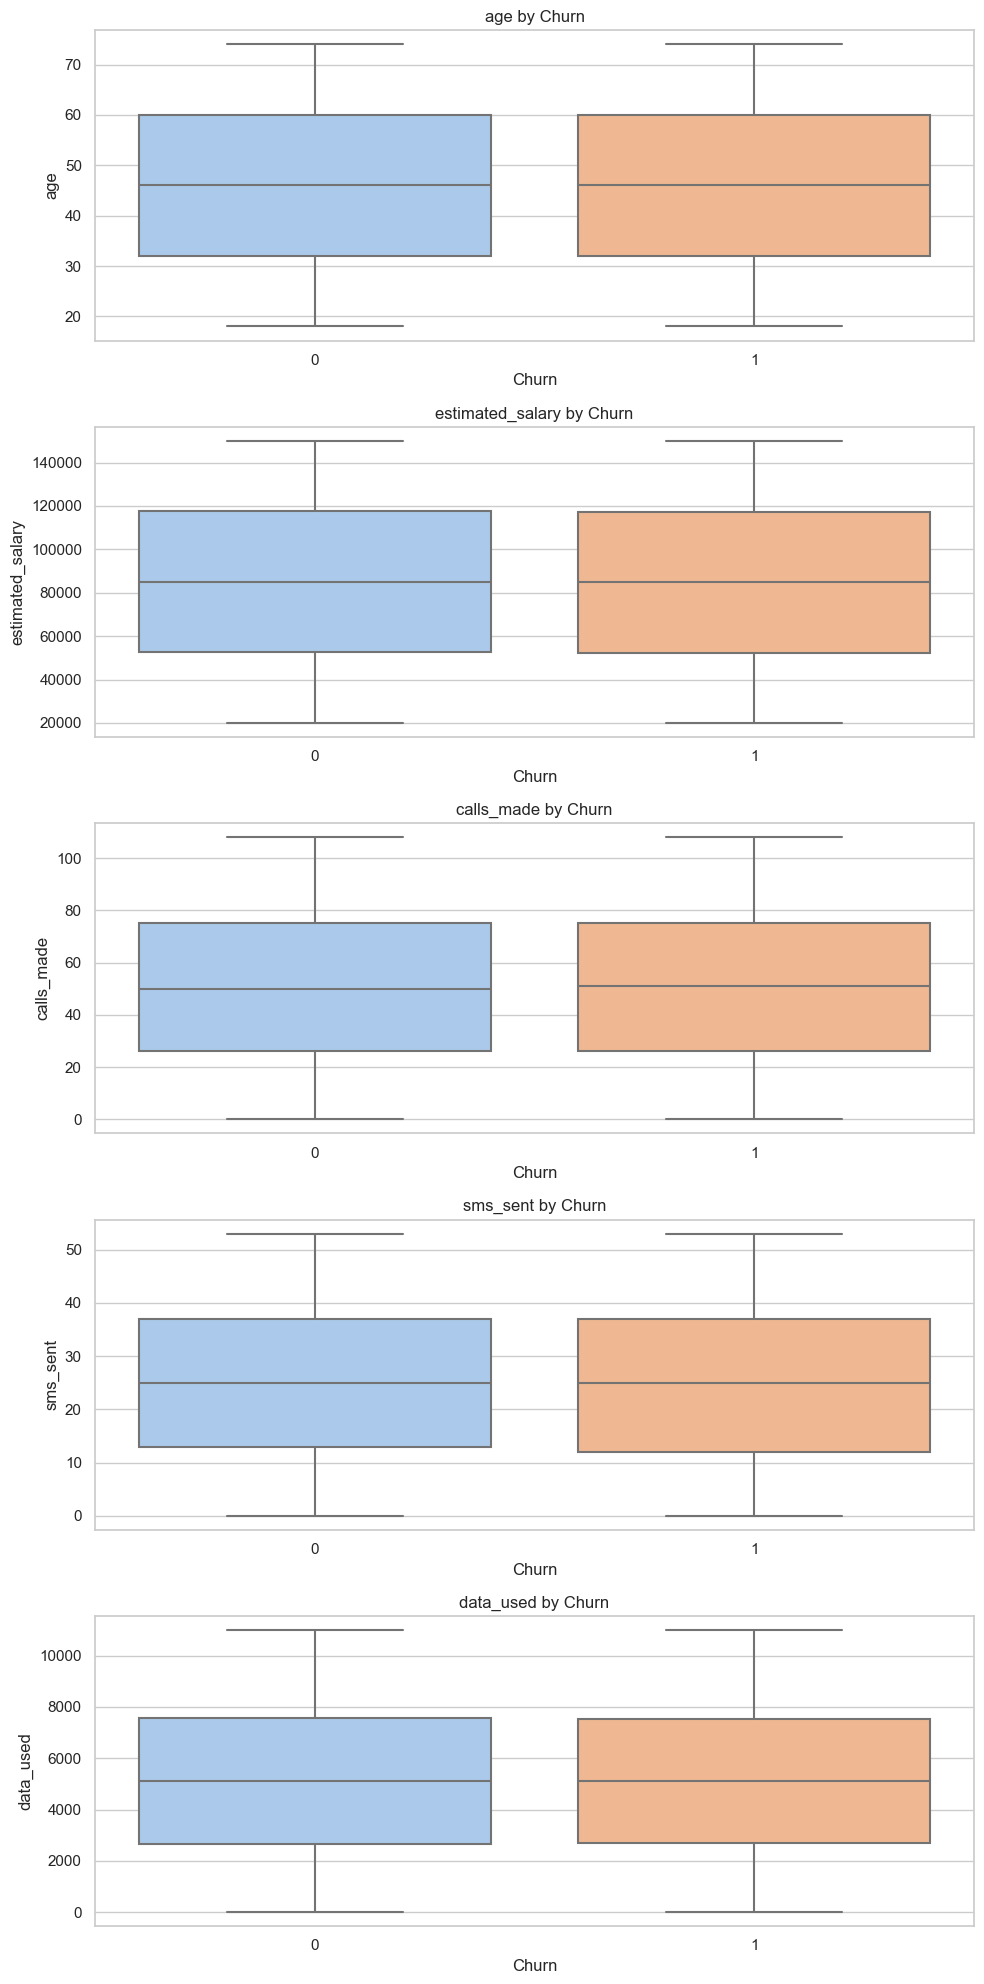

In [188]:
sns.set(style="whitegrid")


num_cols = ['age', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']


fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, len(num_cols)*4))


for i, col in enumerate(num_cols):
    sns.boxplot(data=churn_partial, x='churn', y=col, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col} by Churn', fontsize=12)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

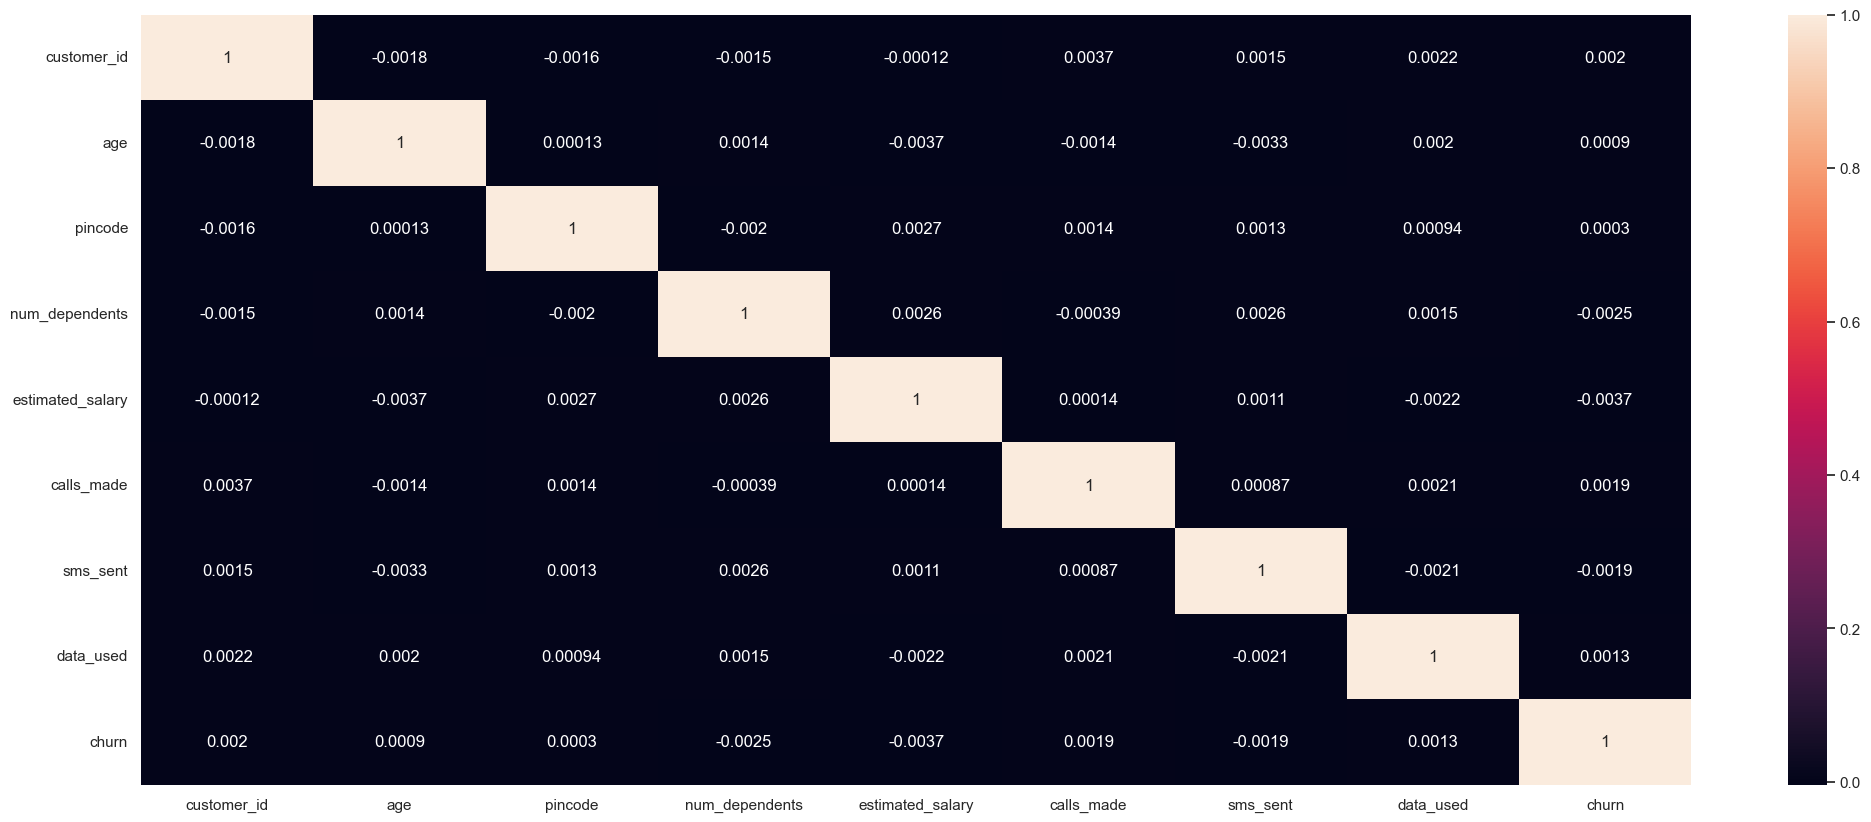

In [189]:
plt.figure(figsize=(25,10))
sns.heatmap(churn_partial.corr(), annot=True)
plt.show()

In [190]:
pf.ProfileReport(churn_partial)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [191]:
df_model = churn_partial.copy()

In [192]:
df_model = df_model.drop(['customer_id'], axis=1)

## Encode Categorical Variables

In [193]:
model=LabelEncoder()
for i in df_model.columns:
    if df_model[i].dtype=="object":
        df_model[i]=model.fit_transform(df_model[i])

In [194]:
df_model.head()

telecom_partner  gender  age  state  city  pincode  date_of_registration  \
1                2       0   55     16     5   125926                     0   
2                3       0   57      1     2   423976                     0   
3                1       1   46     22     4   522841                     0   
4                1       0   26     24     2   740247                     0   
5                3       1   36     26     1   120612                     0   

   num_dependents  estimated_salary  calls_made  sms_sent  data_used  churn  
1               2            130556          62        39       5973      0  
2               0            148828          49        24        193      1  
3               1             38722          80        25       9377      1  
4               2             55098          78        15       1393      0  
5               1             73452          91        24       8109      0

In [195]:
X = df_model.drop('churn', axis=1)
y = df_model['churn']

In [196]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Handling Class Imbalance

In [197]:
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

### Feature Scaling

In [198]:
model=StandardScaler()

x_train1=pd.DataFrame(model.fit_transform(x_train1),columns=x_train.columns)
x_test=pd.DataFrame(model.fit_transform(x_test),columns=x_test.columns)

In [199]:
print(x_train1.shape)
print(x_test.shape)
print(y_train1.shape)
print(y_test.shape)

(286652, 12)
(44794, 12)
(286652,)
(44794,)


## Model Building and Evaluation

### Random Forest

In [200]:
RFmodel=RandomForestClassifier()

In [201]:
RFmodel.fit(x_train1,y_train1)

RandomForestClassifier()

In [202]:
y_predRF=RFmodel.predict(x_test)

In [203]:
classification_metrics(y_test,y_predRF)

Accuracy is:  0.6182524445238201
Precision is:  0.19850547499260135
Recall is:  0.2997765363128492
F1-Score is:  0.23884981750200301


In [204]:
y_predRF_train=RFmodel.predict(x_train1)

In [205]:
classification_metrics(y_train1,y_predRF_train)

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1-Score is:  1.0


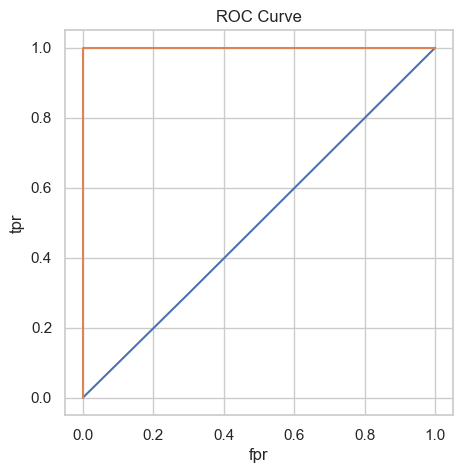

In [206]:
roc_curve_plot(y_test,y_predRF,y_train1,y_predRF_train)

In [207]:
RFmodel=RandomForestClassifier(max_depth=16)

In [208]:
RFmodel.fit(x_train1,y_train1)

RandomForestClassifier(max_depth=16)

In [209]:
y_predRF=RFmodel.predict(x_test)

In [210]:
classification_metrics(y_test,y_predRF)

Accuracy is:  0.5821985087288476
Precision is:  0.19888991674375578
Recall is:  0.36033519553072624
F1-Score is:  0.25630836479237035


In [211]:
y_predRF_train=RFmodel.predict(x_train1)

In [212]:
classification_metrics(y_train1,y_predRF_train)

Accuracy is:  0.7613796519821945
Precision is:  0.7534109434294102
Recall is:  0.7771025494327617
F1-Score is:  0.7650733791502237


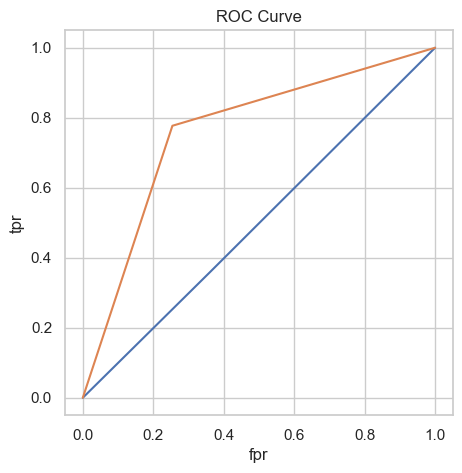

In [213]:
roc_curve_plot(y_test,y_predRF,y_train1,y_predRF_train)

In [81]:
mod=RandomForestClassifier()
parameters=[{'max_depth':[3,5,7,10,12,15,16]}]
grid_model=RandomizedSearchCV(param_distributions=parameters,estimator=mod)

In [82]:
grid_model.fit(x_train1,y_train1)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [3, 5, 7, 10, 12, 15,
                                                       16]}])

In [83]:
grid_model.best_params_

{'max_depth': 16}

In [84]:
grid_model.best_score_

0.7086439268062773

<AxesSubplot:>

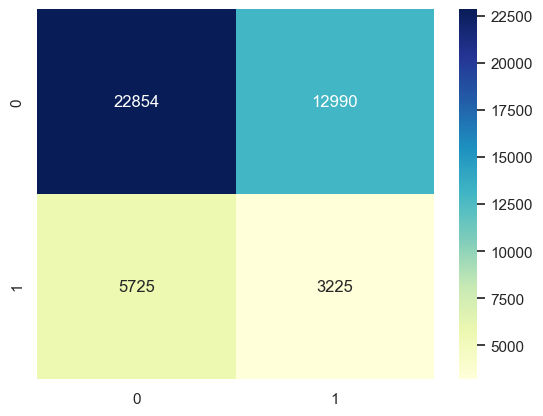

In [214]:
sns.heatmap(confusion_matrix(y_test,y_predRF), annot=True, fmt='d', cmap='YlGnBu')

### Decision Tree

In [216]:
model_dt=DecisionTreeClassifier()

In [217]:
model_dt.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [218]:
y_pred_dt=model_dt.predict(x_test)

In [219]:
y_pred_dt

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [220]:
classification_metrics(y_test,y_pred_dt)

Accuracy is:  0.5496718310488011
Precision is:  0.19872207903780068
Recall is:  0.4135195530726257
F1-Score is:  0.2684412852687314


In [221]:
y_pred_dt_train=model_dt.predict(x_train1)

In [222]:
classification_metrics(y_train1,y_pred_dt_train)

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1-Score is:  1.0


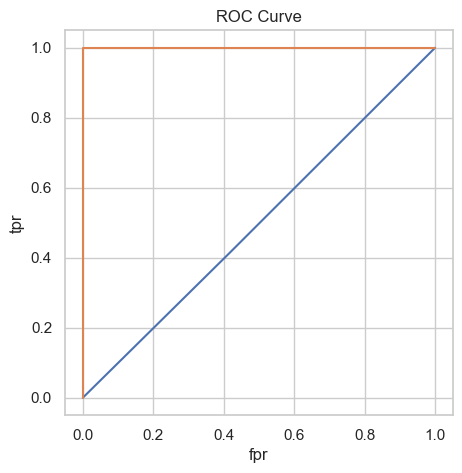

In [223]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred_dt)
fpr1, tpr1, thresholds1 = roc_curve(y_train1 ,y_pred_dt_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

In [224]:
model_dt=DecisionTreeClassifier(max_depth=3)

In [225]:
model_dt.fit(x_train1,y_train1)

DecisionTreeClassifier(max_depth=3)

In [226]:
y_pred_dt=model_dt.predict(x_test)

In [227]:
y_pred_dt

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [228]:
classification_metrics(y_test,y_pred_dt)

Accuracy is:  0.6554449256596866
Precision is:  0.1986988847583643
Recall is:  0.2388826815642458
F1-Score is:  0.21694571283612377


In [229]:
y_pred_dt_train=model_dt.predict(x_train1)

In [230]:
classification_metrics(y_train1,y_pred_dt_train)

Accuracy is:  0.6288705468651885
Precision is:  0.6748818845451017
Recall is:  0.4973207931568592
F1-Score is:  0.572653177635041


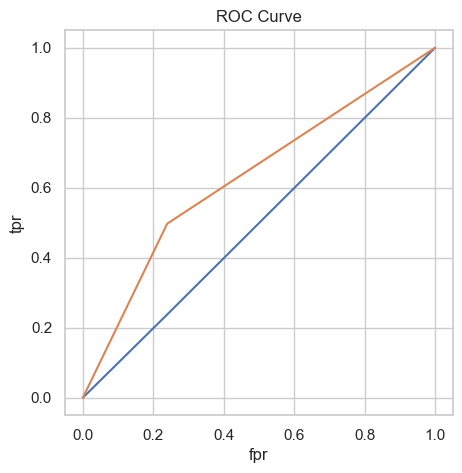

In [231]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred_dt)
fpr1, tpr1, thresholds1 = roc_curve(y_train1 ,y_pred_dt_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

<AxesSubplot:>

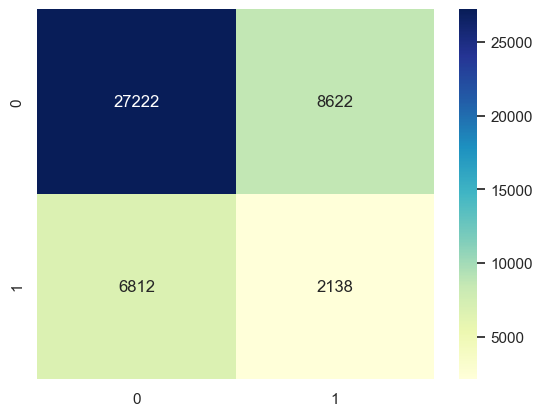

In [232]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True, fmt='d', cmap='YlGnBu')

### Logistic Regresion

In [233]:
modellr=LogisticRegression()

In [234]:
modellr.fit(x_train1,y_train1)

LogisticRegression()

In [235]:
y_pred=modellr.predict(x_test)

In [236]:
modellr.predict_proba(x_test)

array([[0.55198663, 0.44801337],
       [0.57753422, 0.42246578],
       [0.3524198 , 0.6475802 ],
       ...,
       [0.40637753, 0.59362247],
       [0.41174637, 0.58825363],
       [0.36554871, 0.63445129]])

In [237]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [238]:
classification_metrics(y_test,y_pred)

Accuracy is:  0.5125016743313837
Precision is:  0.20274945795082344
Recall is:  0.4910614525139665
F1-Score is:  0.28700166519737486


In [239]:
y_pred_lr_train=modellr.predict(x_train1)

In [240]:
classification_metrics(y_train1,y_pred_lr_train)

Accuracy is:  0.613559298382708
Precision is:  0.6126491514631378
Recall is:  0.6175990399508812
F1-Score is:  0.6151141377992426


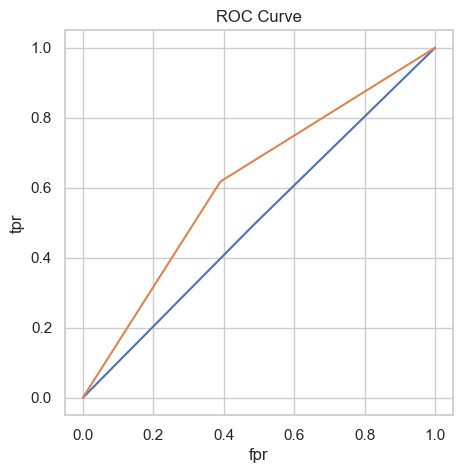

In [241]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_train1 ,y_pred_lr_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

<AxesSubplot:>

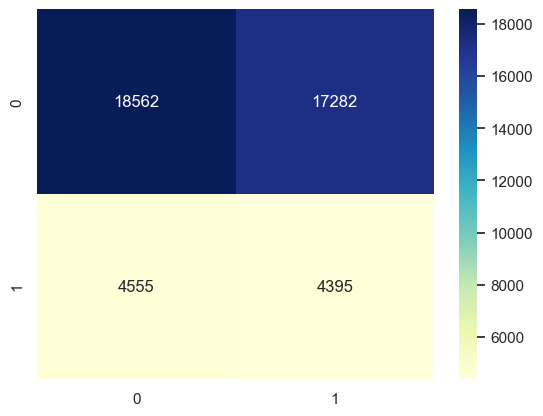

In [242]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='YlGnBu')

### XGBoost

In [243]:
modelgb= XGBClassifier()

In [244]:
modelgb.fit(x_train1,y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [245]:
y_pred=modelgb.predict(x_test)

In [246]:
modelgb.predict_proba(x_test)

array([[0.80754805, 0.19245192],
       [0.41220748, 0.5877925 ],
       [0.30238748, 0.6976125 ],
       ...,
       [0.31874233, 0.68125767],
       [0.5686745 , 0.4313255 ],
       [0.40116376, 0.59883624]], dtype=float32)

In [247]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [248]:
classification_metrics(y_test,y_pred)

Accuracy is:  0.29655757467517974
Precision is:  0.2
Recall is:  0.8402234636871508
F1-Score is:  0.323093447905478


In [249]:
y_pred_xgb_train=modelgb.predict(x_train1)

In [250]:
classification_metrics(y_train1,y_pred_xgb_train)

Accuracy is:  0.7302373609812595
Precision is:  0.7349753624426785
Recall is:  0.7201554498137114
F1-Score is:  0.727489938751489


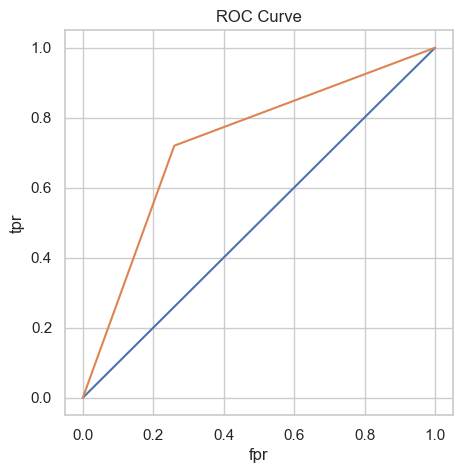

In [251]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_train1 ,y_pred_xgb_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

<AxesSubplot:>

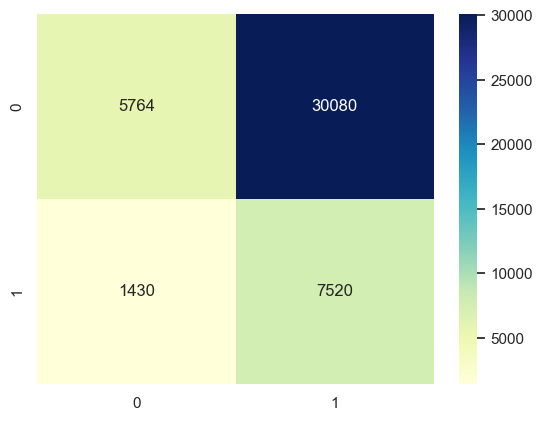

In [252]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='YlGnBu')

### GradientBoostingClassifier

In [253]:
modelgbc = GradientBoostingClassifier(max_depth=3, random_state=42)

In [254]:
modelgbc.fit(x_train1,y_train1)

GradientBoostingClassifier(random_state=42)

In [255]:
y_pred=modelgbc.predict(x_test)

In [256]:
modelgbc.predict_proba(x_test)

array([[0.71678044, 0.28321956],
       [0.67767647, 0.32232353],
       [0.3157108 , 0.6842892 ],
       ...,
       [0.53410612, 0.46589388],
       [0.68345537, 0.31654463],
       [0.36130743, 0.63869257]])

In [257]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [258]:
classification_metrics(y_test,y_pred)

Accuracy is:  0.5609456623654954
Precision is:  0.1990114025726001
Recall is:  0.3958659217877095
F1-Score is:  0.2648674914962808


In [259]:
y_pred_gb_train=modelgbc.predict(x_train1)

In [260]:
classification_metrics(y_train1,y_pred_gb_train)

Accuracy is:  0.6977066268506761
Precision is:  0.6931924322481677
Recall is:  0.7093897827330701
F1-Score is:  0.7011975820773031


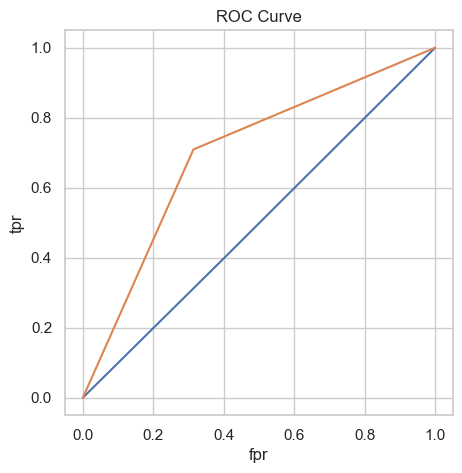

In [261]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_train1 ,y_pred_gb_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

<AxesSubplot:>

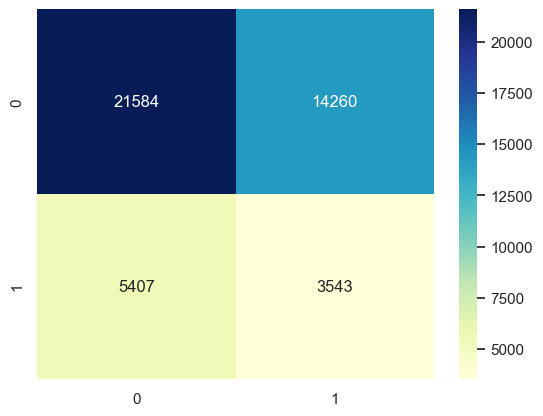

In [262]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='YlGnBu')

### Feature importance

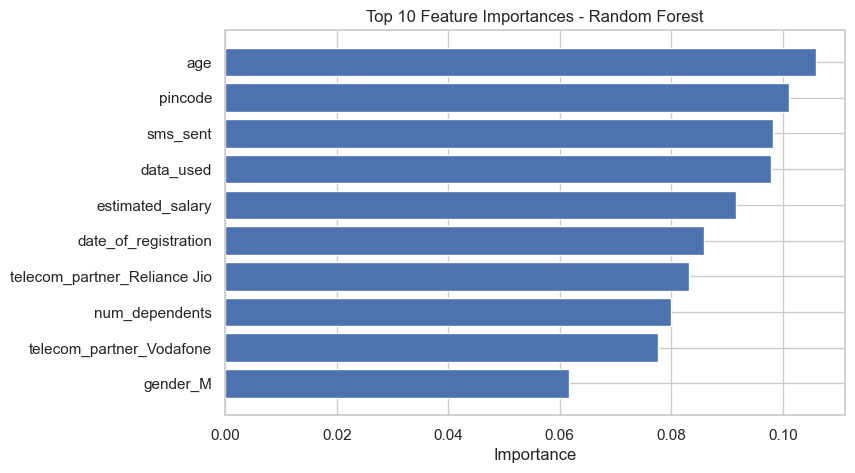

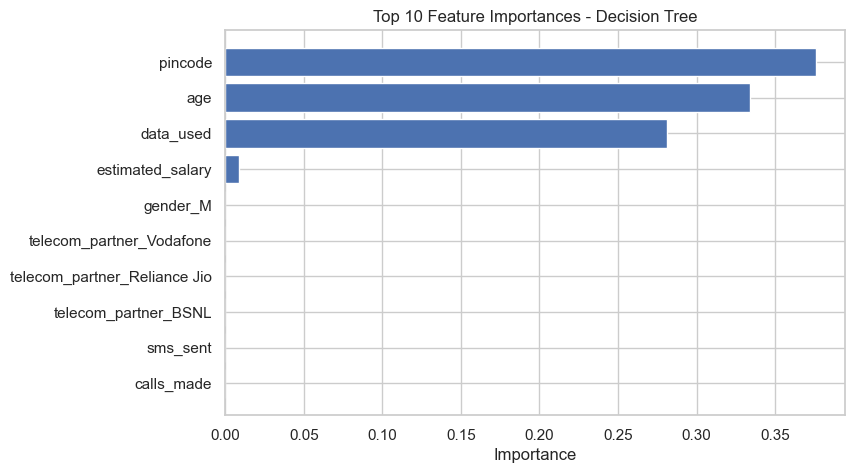

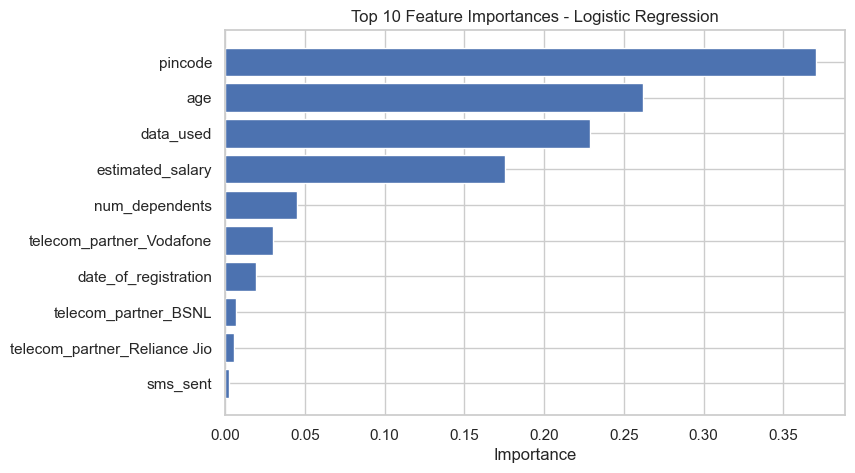

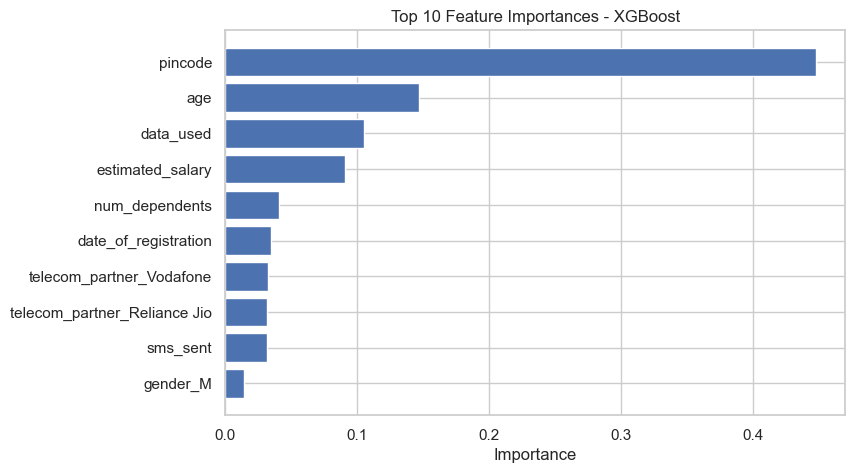

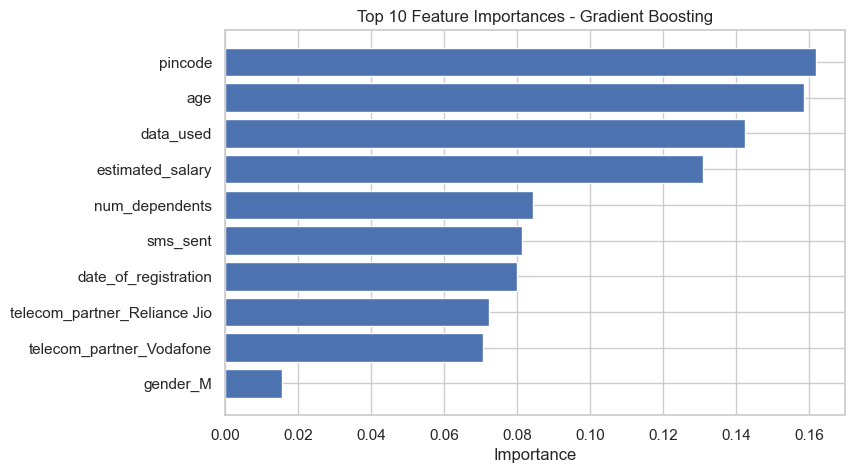

In [263]:
def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = abs(model.coef_[0])
    else:
        print(f"{title} does not support feature importance.")
        return

    sorted_idx = np.argsort(importances)[-10:]  
    plt.figure(figsize=(8, 5))
    plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
    plt.title(f'Top 10 Feature Importances - {title}')
    plt.xlabel('Importance')
    plt.grid(True)
    plt.show()


plot_feature_importance(RFmodel, X_train.columns, "Random Forest")
plot_feature_importance(model_dt, X_train.columns, "Decision Tree")
plot_feature_importance(modellr, X_train.columns, "Logistic Regression")
plot_feature_importance(modelgb, X_train.columns, "XGBoost")
plot_feature_importance(modelgbc, X_train.columns, "Gradient Boosting")

### Hyperparameter tuning

In [266]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(RFmodel, param_grid_rf, cv=3, scoring='roc_auc')
grid_rf.fit(x_train1, y_train1)
print("Best params RF:", grid_rf.best_params_)

Best params RF: {'max_depth': None, 'n_estimators': 200}


### Overfitting or Underfitting

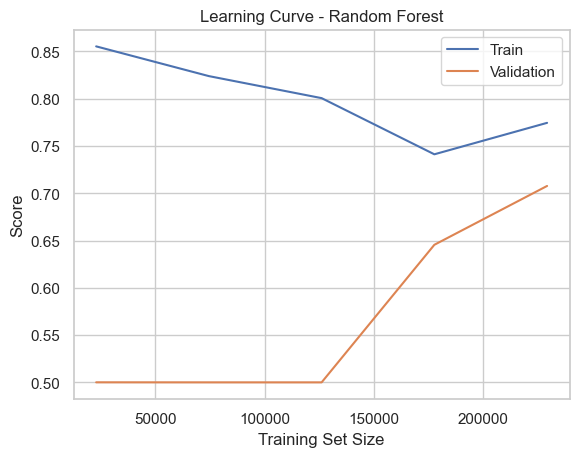

In [268]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(RFmodel, x_train1, y_train1,  cv=5)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

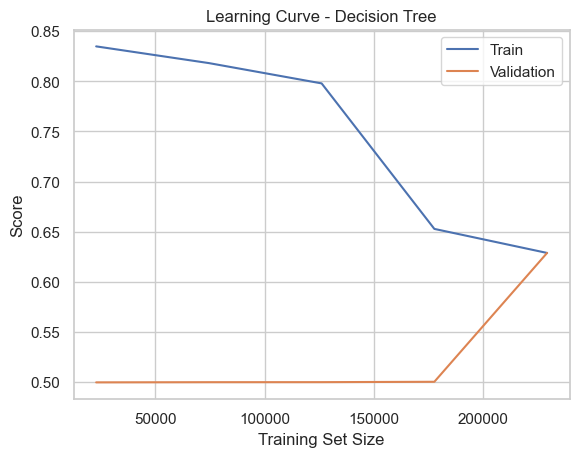

In [269]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model_dt, x_train1, y_train1,  cv=5)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.title("Learning Curve - Decision Tree")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

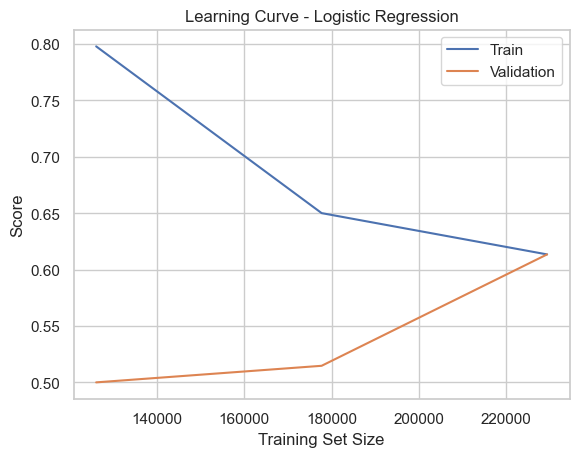

In [270]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(modellr, x_train1, y_train1,  cv=5)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.title("Learning Curve - Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

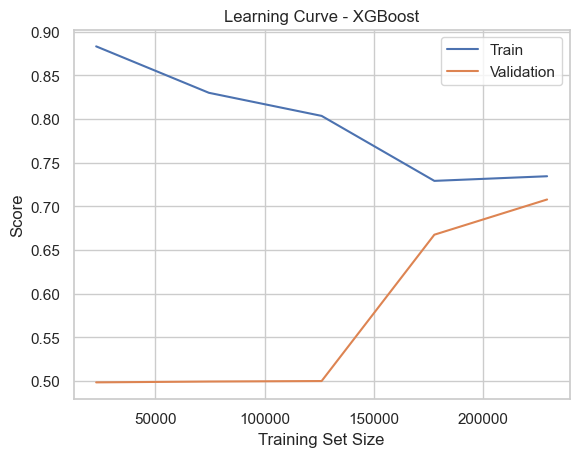

In [271]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(modelgb, x_train1, y_train1,  cv=5)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.title("Learning Curve - XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

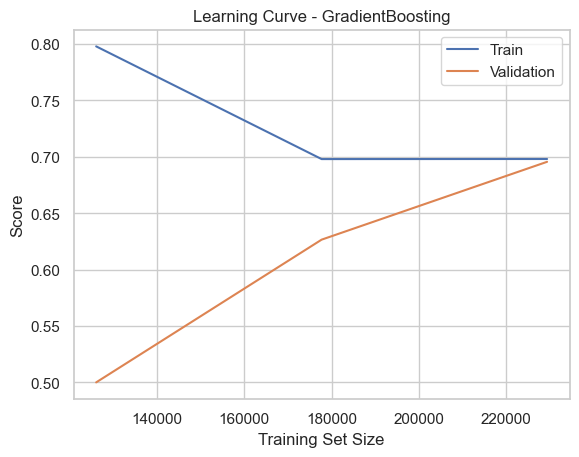

In [272]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(modelgbc, x_train1, y_train1,  cv=5)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.title("Learning Curve - GradientBoosting")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

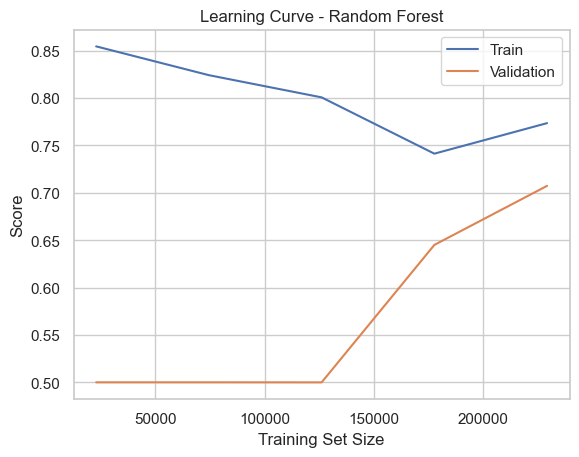

In [273]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(RFmodel, x_train1, y_train1,  cv=5)
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Train')
plt.plot(train_sizes, val_mean, label='Validation')
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

### Conver recall/precision into business outcomes

In [ ]:
from sklearn.metrics import confusion_matrix

def business_impact(y_true, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    avg_value = 1000
    cost = 100
    loss_multiplier = 2

    saved = tp * avg_value
    lost = fn * avg_value * loss_multiplier
    retention_cost = fp * cost
    net = saved - lost - retention_cost

    print(f"\n{model_name}:")
    print(f"  TP: {tp}, FN: {fn}, FP: {fp}")
    print(f"  Revenue Saved: ${saved}")
    print(f"  Revenue Lost: ${lost}")
    print(f"  Retention Cost: ${retention_cost}")
    print(f"  Net Benefit: ${net}")


y_pred_rf = RFmodel.predict(X_test)
business_impact(y_test, y_pred_rf, "Random Forest")